In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [3]:
from sklearn.metrics import accuracy_score

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=0.98
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


In [4]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


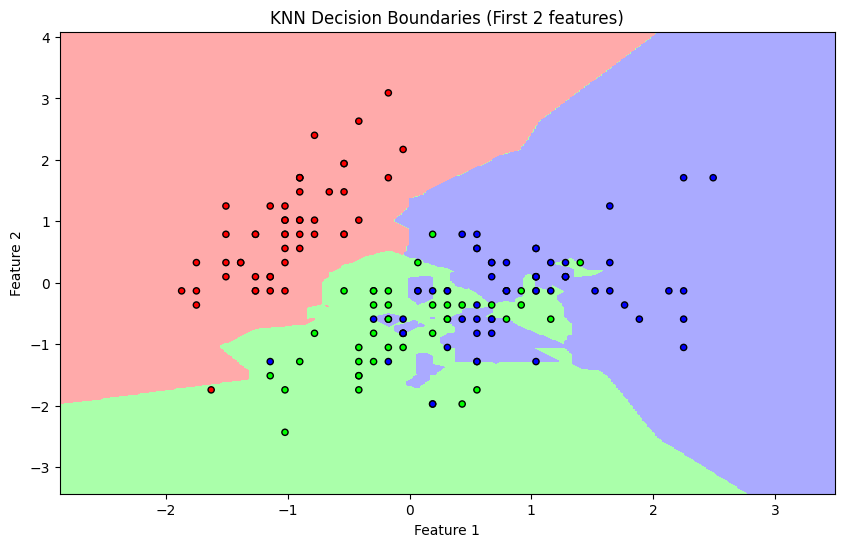

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("KNN Decision Boundaries (First 2 features)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
